In [1]:
from graph import create_graph

graph = create_graph()

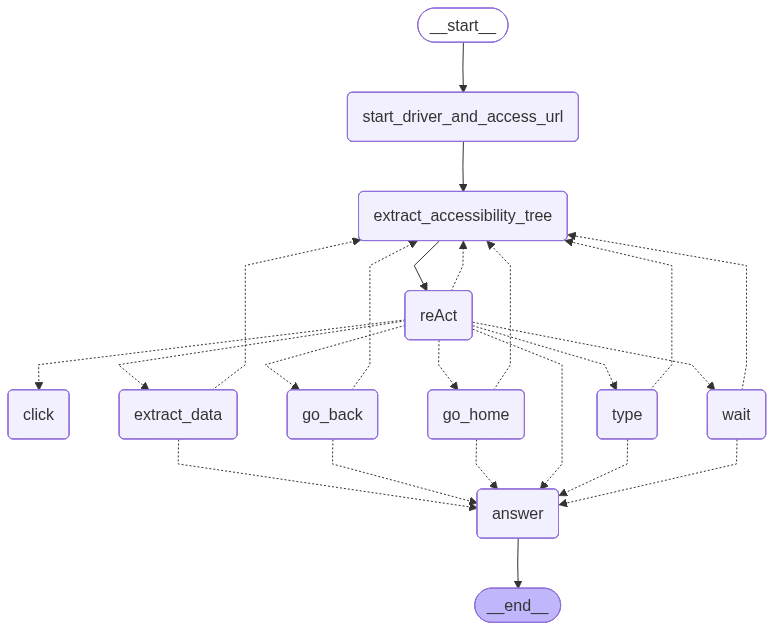

In [2]:
# ...existing code...
from IPython.display import display, Image

# If draw_mermaid_png() returns PNG bytes:
display(Image(data=graph.get_graph(xray=True).draw_mermaid_png()))

# If it returns a filename/path, use:
# display(Image(filename=graph.get_graph(xray=True).draw_mermaid_png()))
# ...existing code...

In [ ]:
from typing import TypedDict, Annotated, Any, List, Union
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from selenium.webdriver.remote.webelement import WebElement

class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]
    task: str
    data_from_web_elements: List[str]
    web_element: WebElement
    url: str
    driver: object
    accessibility_tree_str: str
    accessibility_node_map: dict[str, Any]
    action_history: List[List[Union[str, str, str]]] # [role, name, action]
    warn_obs: List[str]
    action: List[Union[int, str]]
    tool_count: int = 0
    max_tool_usage: int = 3
    final_anwser: str

In [6]:
initial_state: State = {
    "messages": [],
    # "task": "Click on the Terms link at the bottom of the page", # FOR CLICK TESTING
    # "task": "Type 'Hello, Chatgpt' into the text box", # FOR TYPE TESTING
    # "task": "Wait for 5 seconds", # FOR WAIT TESTING
    # "task": "Go to the home page", # FOR GO HOME TESTING
    "task": "Find the terms link and find out when the terms are published", # FOR EXTRACT DATA TESTING
    "data_from_web_elements": [],
    "web_element": None,
    "url": "https://chatgpt.com",
    "driver": None,
    "accessbility_tree_str": "",
    "accessbility_node_map": {},
    "action_history": [],
    "warn_obs": [],
    "action": [], 
    "tool_count": 0,
    "max_tool_usage": 3,
    "final_anwser": "",       
}

final_state = graph.invoke(initial_state)

AttributeError: 'int' object has no attribute 'lower'

In [5]:
final_state

{'messages': [HumanMessage(content="\n    Message for ReAct Agent:\n    Task: Wait for 5 seconds\n    Accessibility Tree:  [1] RootWebArea 'ChatGPT'\n\t [2] link 'Skip to content'\n\t\t [3] InlineTextBox 'Skip to content'\n\t [4] heading 'What can I help with?'\n\t\t [5] InlineTextBox 'What can I help with?'\n\t [6] textbox 'Ask anything'\n\t [7] button 'Add photos'\n\t [8] button 'Start voice mode'\n\t [9] StaticText 'By messaging ChatGPT, you agree to our '\n\t\t [10] InlineTextBox 'By messaging ChatGPT, you agree to our '\n\t [11] link 'Terms'\n\t\t [12] InlineTextBox 'Terms'\n\t [13] StaticText ' and have read our '\n\t\t [14] InlineTextBox ' and have read our '\n\t [15] link 'Privacy Policy'\n\t\t [16] InlineTextBox 'Privacy Policy'\n\t [17] StaticText '.'\n\t\t [18] InlineTextBox '.'\n    Action History: []\n    ", additional_kwargs={}, response_metadata={}, id='fcf1966a-4260-4e67-a28e-51ec19989847'),
  AIMessage(content="Thought: The user explicitly wants to wait for 5 seconds. 